In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os


import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
# Original Based on Islams illustrations
def DAS_to_2D(origdata):
    # print(origdata.shape[1])
    print("nwin = ",origdata.shape[1]//3)
    data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    data_3D = data_3D.transpose([2,0,1])
    data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]],order='C')
    return data_2D

# Test to check the above didn't make banding
# def DAS_to_2D(origdata):
#     # print(origdata.shape[1])
#     print("nwin = ",origdata.shape[1]//3)
#     data_3D = np.zeros([origdata.shape[0],origdata.shape[1]//3,3])
#     data_3D[:,:,0]= origdata[:,::3]
#     data_3D[:,:,1]= origdata[:,1::3]
#     data_3D[:,:,2]= origdata[:,2::3]
#     data_3D = data_3D.transpose([2,0,1])
#     data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
#     return data_2D


In [51]:
# Original Based on Islams illustrations
def DAS_to_2D_cut(origdata):
    # print(origdata.shape[1])
    npwin = origdata.shape[1]//3
    print("nwin = ",npwin)
    x0 = origdata[:,:npwin]
    x1 = origdata[:,npwin:2*npwin]
    # data_3D = origdata.reshape([origdata.shape[0],origdata.shape[1]//3,3])
    # data_3D = data_3D.transpose([2,0,1])
    # data_2D = data_3D.reshape([3,data_3D.shape[1]*data_3D.shape[2]])
    return x1.ravel()


In [52]:
file = '/media/birniece/Extreme SSD/HydraFrac/ProcessingDASTests/FinishedProcessedData_BackgroundOnly/ProcessedData_WithoutRemovedTraces/Wrap_12_time.csv'

wrap_cut = DAS_to_2D_cut(np.loadtxt(file, delimiter=',',))
wrap_reshape = DAS_to_2D(np.loadtxt(file, delimiter=',',))[1]

# new_w15_data = DAS_to_2D(np.loadtxt('/home/birniece/Downloads/extt_Wrap_1_time.csv', delimiter=',',))[1]
# orig_w15_data = DAS_to_2D(np.loadtxt('/home/birniece/Downloads/Wrap_1_time.csv', delimiter=',',))[1]

# new_w15_data = DAS_to_2D(np.loadtxt('/home/birniece/Downloads/Wrap_10_time(1).csv', delimiter=',',))[1]
# orig_w15_data = DAS_to_2D(np.loadtxt('/home/birniece/Downloads/Wrap_10_time.csv', delimiter=',',))[1]

nwin =  501
nwin =  501


In [53]:
mid_point = wrap_cut.shape[0]//501//2

Text(0.5, 1.0, 'RESHAPE Middle Row Pass')

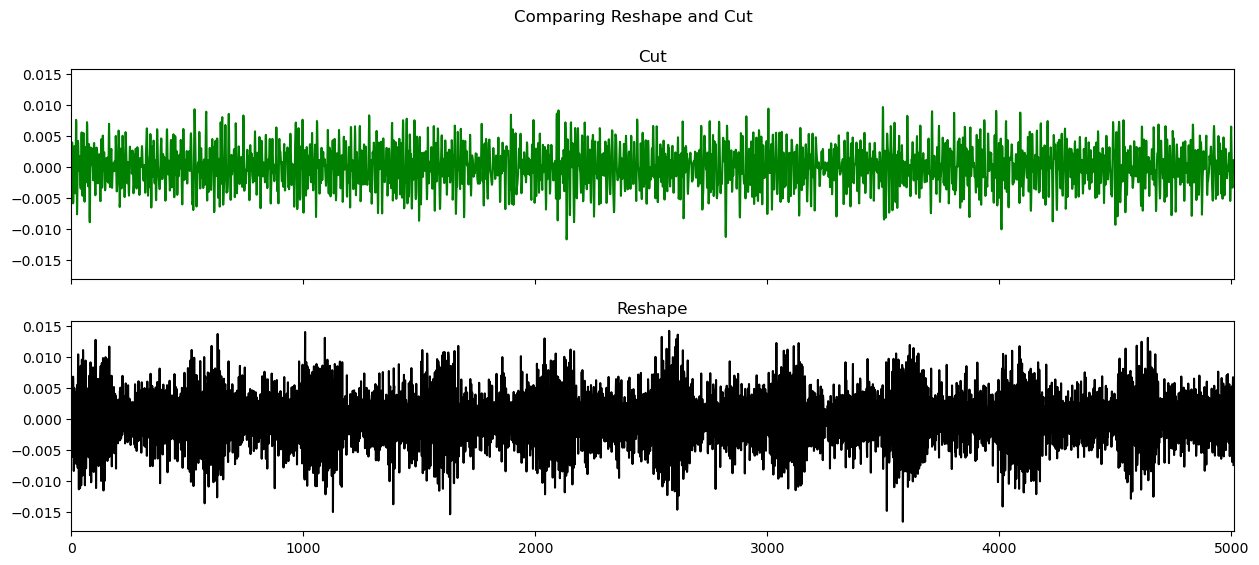

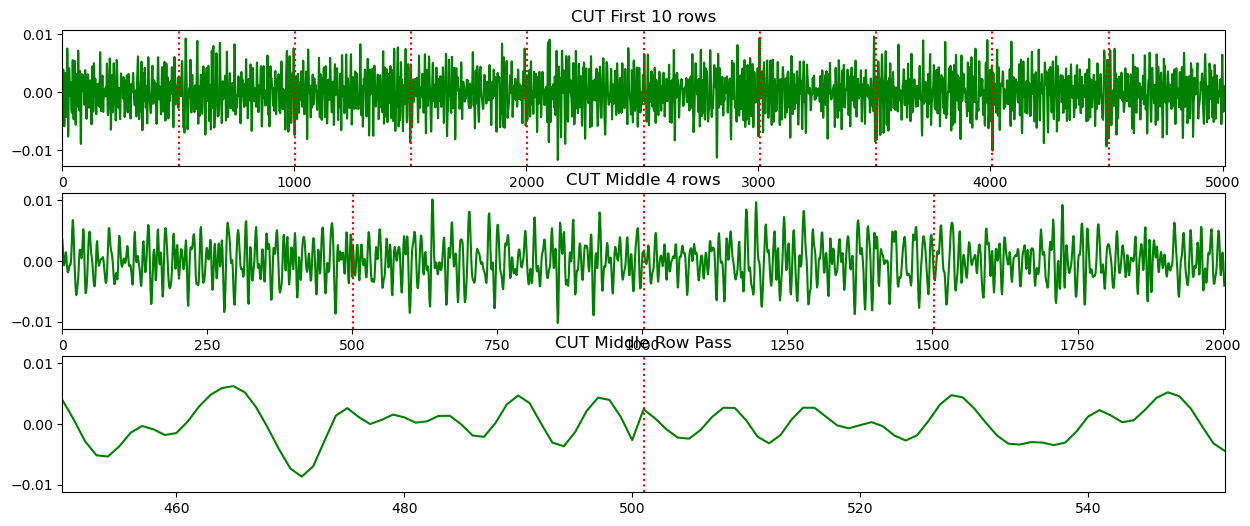

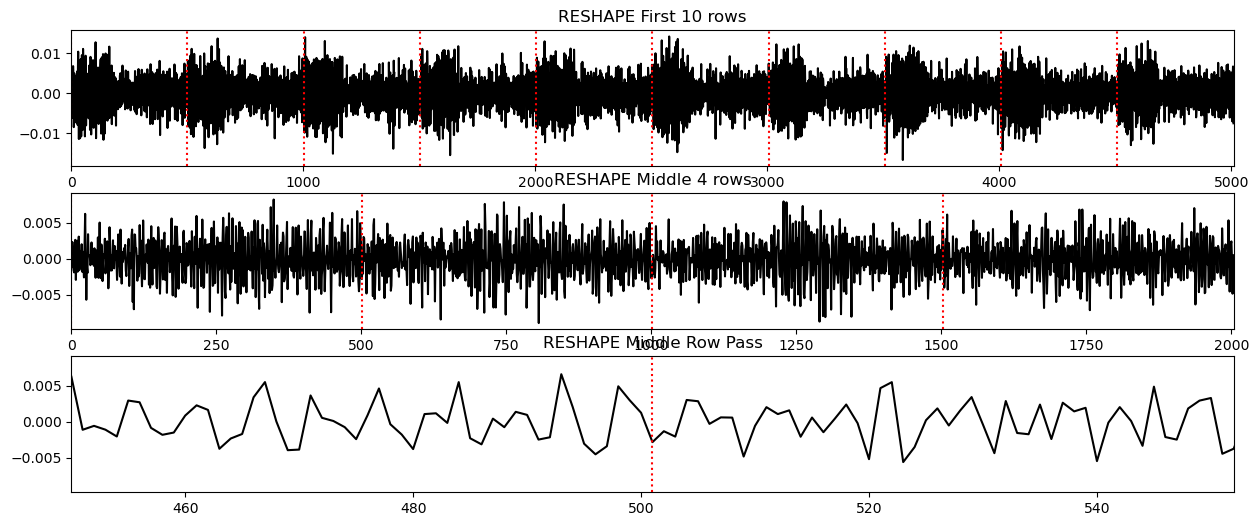

In [54]:
nwins= 10
win_length = 501
fig,axs = plt.subplots(2,1,figsize=[15,6], sharex=True, sharey=True)    

axs[0].plot(wrap_cut[:nwins*win_length], c='green')
axs[1].plot(wrap_reshape[:nwins*win_length], c='k')
# for i in range(nwins):
#     ax.axvline(i*802, c='r')
axs[0].set_title('Cut')
axs[1].set_title('Reshape')
fig.suptitle('Comparing Reshape and Cut')
for ax in axs: ax.set_xlim([0,nwins*win_length])

fig,axs = plt.subplots(3,1,figsize=[15,6])    
# First 100
nwins = 10
axs[0].plot(wrap_cut[:nwins*win_length], c='green')
for i in range(nwins):
    axs[0].axvline(i*win_length, c='r',ls=':')
axs[0].set_title('CUT First 10 rows')
axs[0].set_xlim([0,nwins*win_length])

# Middle 4
nwins = 4
axs[1].plot(wrap_cut[mid_point*win_length:][:nwins*win_length], c='green')
for i in range(nwins):
    axs[1].axvline(i*win_length, c='r',ls=':')
axs[1].set_xlim([0,nwins*win_length])
axs[1].set_title('CUT Middle 4 rows')

# CLOSE SUP
nwins= 2
axs[2].plot(wrap_cut[mid_point*win_length:][:nwins*win_length], c='green')
for i in range(nwins):
    axs[2].axvline(i*win_length, c='r',ls=':')
axs[2].set_xlim([9*win_length//10,nwins*win_length-(9*win_length//10)])
axs[2].set_title('CUT Middle Row Pass')

fig,axs = plt.subplots(3,1,figsize=[15,6])    
# First 100
nwins = 10
axs[0].plot(wrap_reshape[:nwins*win_length], c='k')
for i in range(nwins):
    axs[0].axvline(i*win_length, c='r',ls=':')
axs[0].set_title('RESHAPE First 10 rows')
axs[0].set_xlim([0,nwins*win_length])

# Middle 4
nwins = 4
axs[1].plot(wrap_reshape[mid_point*win_length:][:nwins*win_length], c='k')
for i in range(nwins):
    axs[1].axvline(i*win_length, c='r',ls=':')
axs[1].set_xlim([0,nwins*win_length])
axs[1].set_title('RESHAPE Middle 4 rows')

# CLOSE SUP
nwins= 2
axs[2].plot(wrap_reshape[mid_point*win_length:][:nwins*win_length], c='k')
for i in range(nwins):
    axs[2].axvline(i*win_length, c='r',ls=':')
axs[2].set_xlim([9*win_length//10,nwins*win_length-(9*win_length//10)])
axs[2].set_title('RESHAPE Middle Row Pass')

In [104]:
new_w15_data.shape
new_w15_data

(54163, 501)

(0.0, 2505.0)

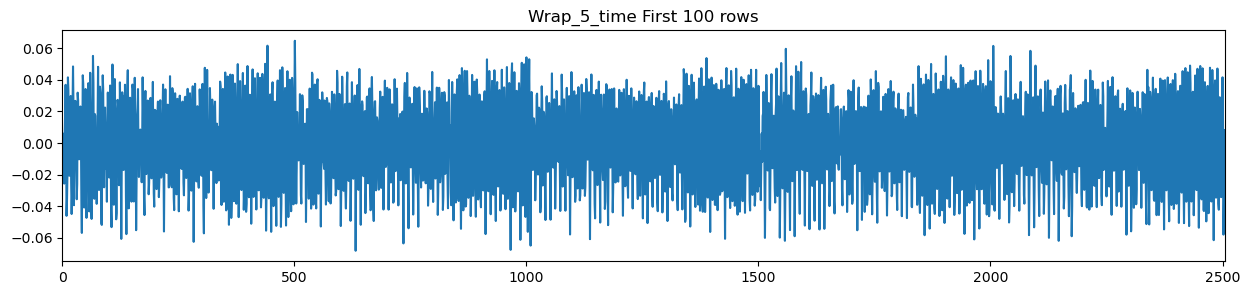

In [108]:
nwins= 5
win_length = 501
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(new_w15_data[:nwins*win_length])
# for i in range(nwins):
#     ax.axvline(i*802, c='r')
ax.set_title('Wrap_5_time First 100 rows')
ax.set_xlim([0,nwins*win_length])

In [87]:
print('New shape:', new_w15_data.shape)
win_length= 501
# print('Orig shape:', orig_w15_data.shape)

New shape: (21676055,)


In [94]:
(len(new_w15_data)//win_length)//2

36

In [98]:
dpath = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Drop Ball Test/Low frequency/Data_Wednesday_January_31_2024_2_53_23_PM/Processed data/Processed data'

wrap_id = 1
mid_point = 36  # 27081
win_length = 2204
for wrap_id in range(1,16):
    new_w15_data = DAS_to_2D(np.loadtxt(dpath+'/Wrap_%i_time.csv'%wrap_id, delimiter=',',))[1]
    
    
    fig,axs = plt.subplots(3,1,figsize=[15,6])    
    # First 100
    nwins = 10
    axs[0].plot(new_w15_data[:nwins*win_length], c='green')
    for i in range(nwins):
        axs[0].axvline(i*win_length, c='r',ls=':')
    axs[0].set_title('Wrap_%i_time First 10 rows'%wrap_id)
    axs[0].set_xlim([0,nwins*win_length])
    
    # Middle 4
    nwins = 4
    axs[1].plot(new_w15_data[mid_point*win_length:][:nwins*win_length], c='green')
    for i in range(nwins):
        axs[1].axvline(i*win_length, c='r',ls=':')
    axs[1].set_xlim([0,nwins*win_length])
    axs[1].set_title('Wrap_%i_time Middle 4 rows'%wrap_id)
    
    # CLOSE SUP
    nwins= 2
    axs[2].plot(new_w15_data[mid_point*win_length:][:nwins*win_length], c='green')
    for i in range(nwins):
        axs[2].axvline(i*win_length, c='r',ls=':')
    axs[2].set_xlim([9*win_length//10,nwins*win_length-(9*win_length//10)])
    axs[2].set_title('Wrap_%i_time Middle Row Pass'%wrap_id)
    
    fig.suptitle('WRAP %i - Low F Dropball'%wrap_id)
    fig.tight_layout()
    fig.savefig(fig_path+'wrap_%i_time.png'%wrap_id)
    plt.close()


nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204
nwin =  2204


In [89]:
fig_path = './Figures/TMP_FiltTests/'
wrap_id = 1
for wrap_id in range(1,16):
    new_w15_data = DAS_to_2D(np.loadtxt('/home/birniece/Documents/data/tmp/Wrap_%i_time.csv'%wrap_id, delimiter=',',))[1]
    win_length = 401
    
    fig,axs = plt.subplots(3,1,figsize=[15,6])    
    # First 100
    nwins = 100
    axs[0].plot(new_w15_data[:nwins*win_length], c='green')
    axs[0].set_title('Wrap_%i_time First 100 rows'%wrap_id)
    axs[0].set_xlim([0,nwins*win_length])
    
    # Middle 4
    nwins = 4
    axs[1].plot(new_w15_data[27081*win_length:][:nwins*win_length], c='green')
    for i in range(nwins):
        axs[1].axvline(i*win_length, c='r',ls=':')
    axs[1].set_xlim([0,nwins*win_length])
    axs[1].set_title('Wrap_%i_time Middle 4 rows'%wrap_id)
    
    # CLOSE SUP
    nwins= 2
    axs[2].plot(new_w15_data[27081*win_length:][:nwins*win_length], c='green')
    for i in range(nwins):
        axs[2].axvline(i*win_length, c='r',ls=':')
    axs[2].set_xlim([9*win_length//10,nwins*win_length-(9*win_length//10)])
    axs[2].set_title('Wrap_%i_time Middle Row Pass'%wrap_id)
    
    fig.suptitle('WRAP %i - Original Version'%wrap_id)
    fig.tight_layout()
    fig.savefig(fig_path+'wrap_%i_time.png'%wrap_id)
    plt.close()

nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401
nwin =  401


Text(0.5, 1.0, 'Wrap_5_time Middle 4 rows')

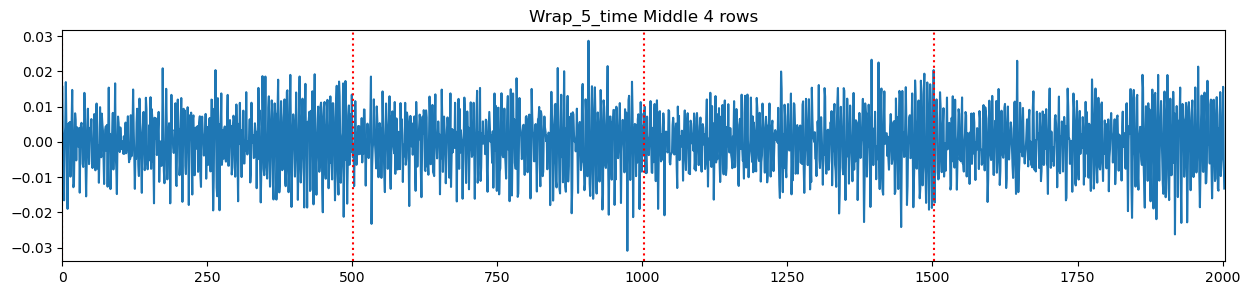

In [61]:
nwins= 4
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(new_w15_data[27081*win_length:][:nwins*win_length])
for i in range(nwins):
    ax.axvline(i*win_length, c='r',ls=':')
ax.set_xlim([0,nwins*win_length])
ax.set_title('Wrap_5_time Middle 4 rows')

Text(0.5, 1.0, 'Wrap_5_time Middle Row Pass')

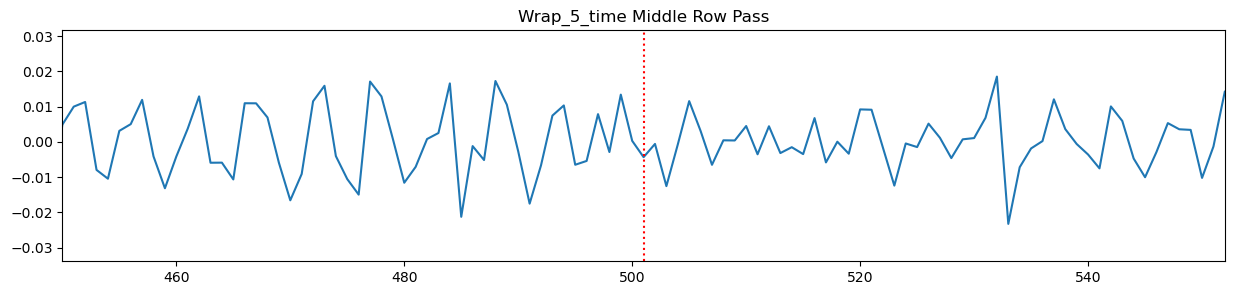

In [62]:
nwins= 2
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(new_w15_data[27081*win_length:][:nwins*win_length])
for i in range(nwins):
    ax.axvline(i*win_length, c='r',ls=':')
ax.set_xlim([9*win_length//10,nwins*win_length-(9*win_length//10)])
ax.set_title('Wrap_5_time Middle Row Pass')

(0.0, 50100.0)

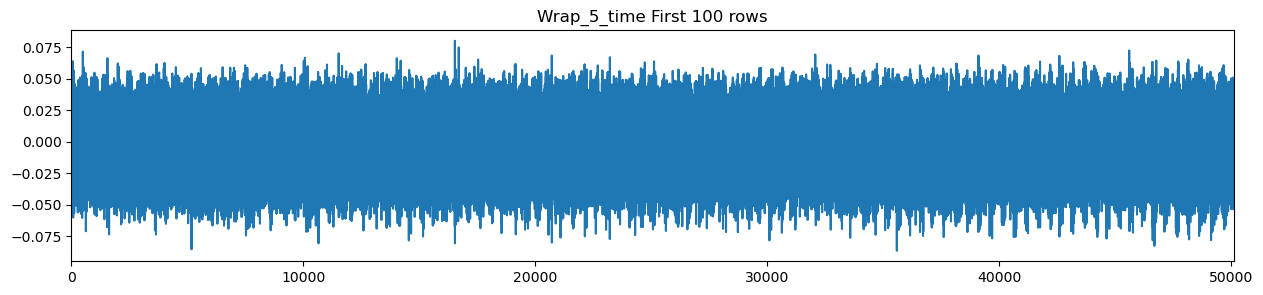

In [63]:
nwins= 100
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(new_w15_data[:nwins*win_length])
# for i in range(nwins):
#     ax.axvline(i*802, c='r')
ax.set_title('Wrap_5_time First 100 rows')
ax.set_xlim([0,nwins*win_length])

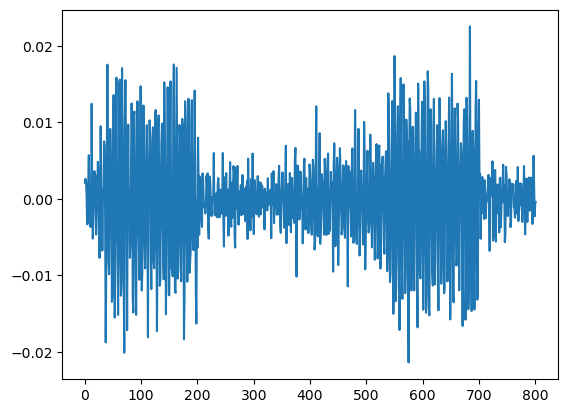

In [57]:
# plt.plot(orig_w15_data[802:2*802])
plt.plot(new_w15_data[802:2*802])

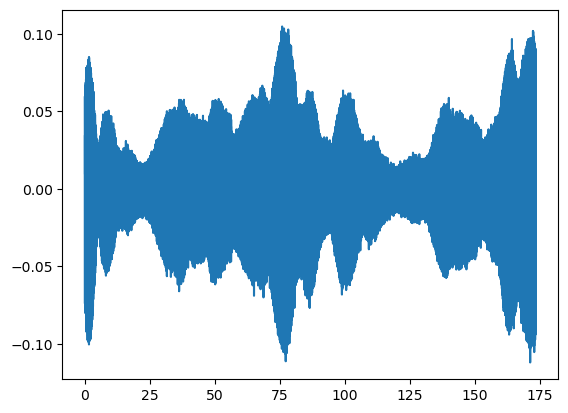

In [27]:
# plt.plot(np.arange(0,len(new_w15_data))*(1/Fs),new_w15_data)
plt.plot(np.arange(0,len(orig_w15_data))*(1/Fs),orig_w15_data)

1600.0


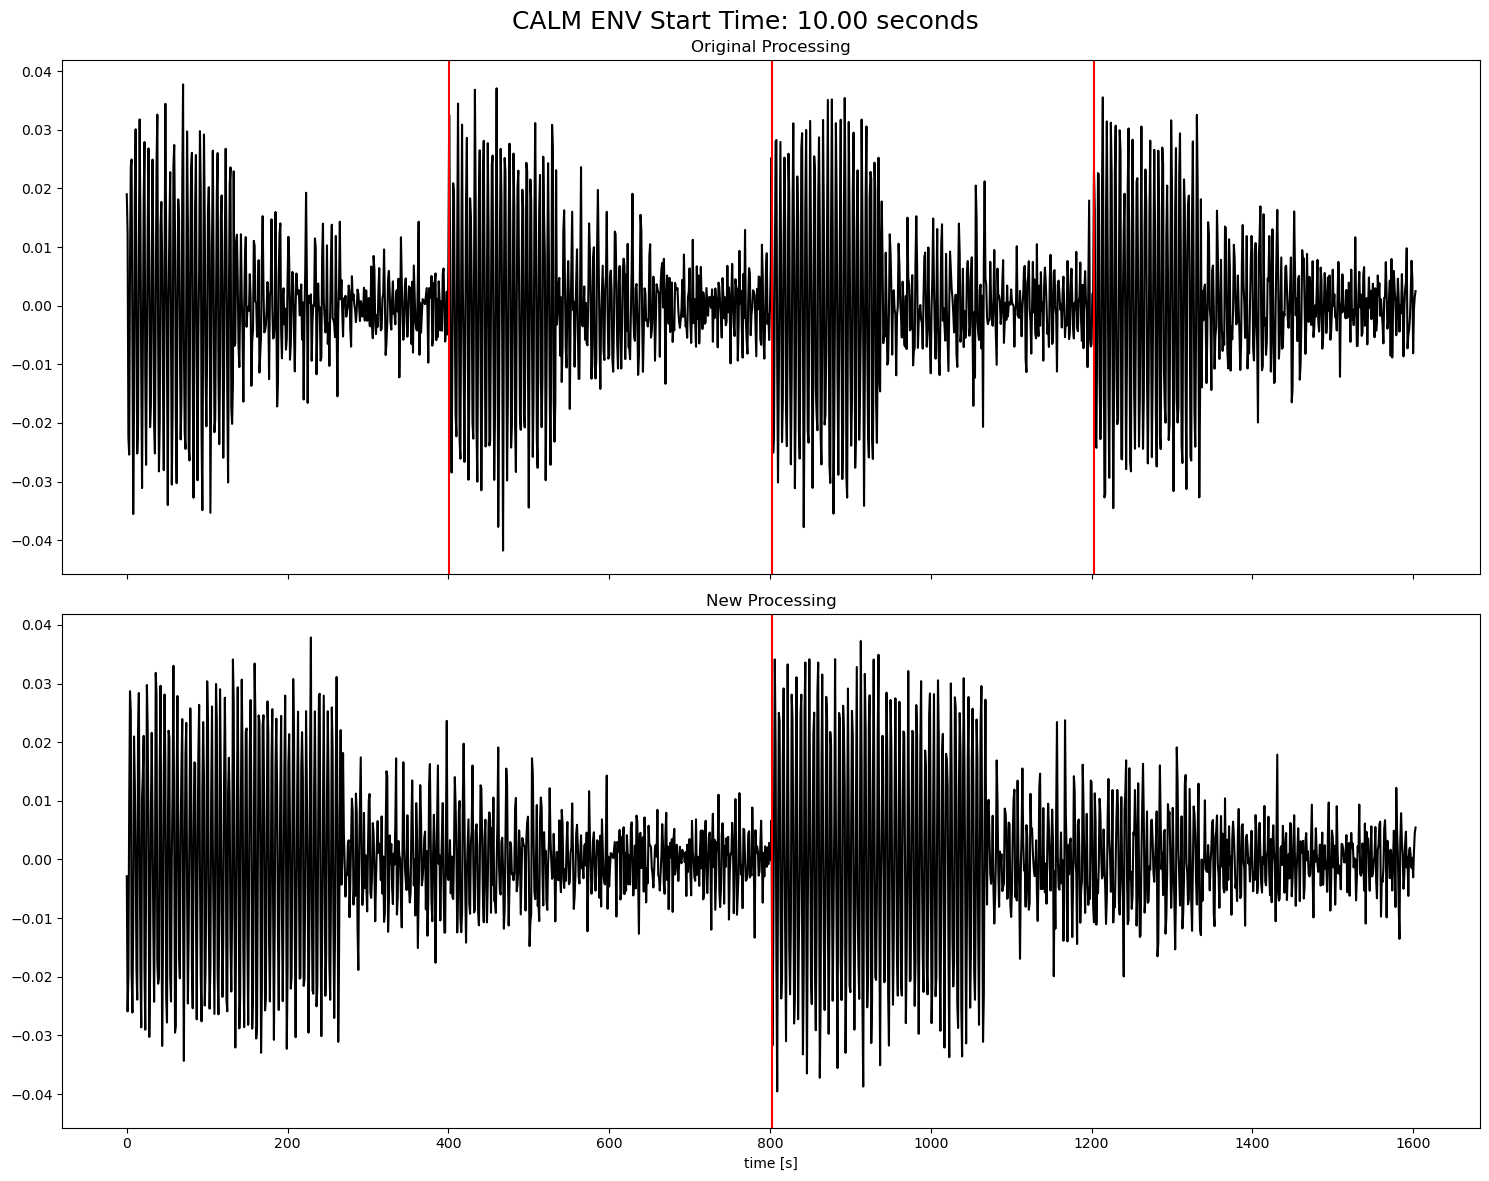

In [18]:
Fs = 125000
dur = 802  # 0.05
start_time = 10
si = 802*1600  #int(start_time*Fs)  # len(new_w15_data)//2
xlim = 2*802  # int(dur * Fs)
print(si/802)
t = np.arange(xlim)*(1/Fs)

fig,axs = plt.subplots(2,1,figsize=[15,12], sharex=True, sharey=True)
axs[0].plot(orig_w15_data[si:si+xlim],'k')
axs[1].plot(new_w15_data[si:si+xlim],'k')
axs[0].axvline(401, c='r')
axs[0].axvline(802, c='r')
axs[0].axvline(1203, c='r')
axs[1].axvline(802, c='r')
axs[0].set_title('Original Processing')
axs[1].set_title('New Processing')
axs[1].set_xlabel('time [s]')
fig.suptitle('CALM ENV Start Time: %.2f seconds'%start_time, fontsize=18)
fig.tight_layout()

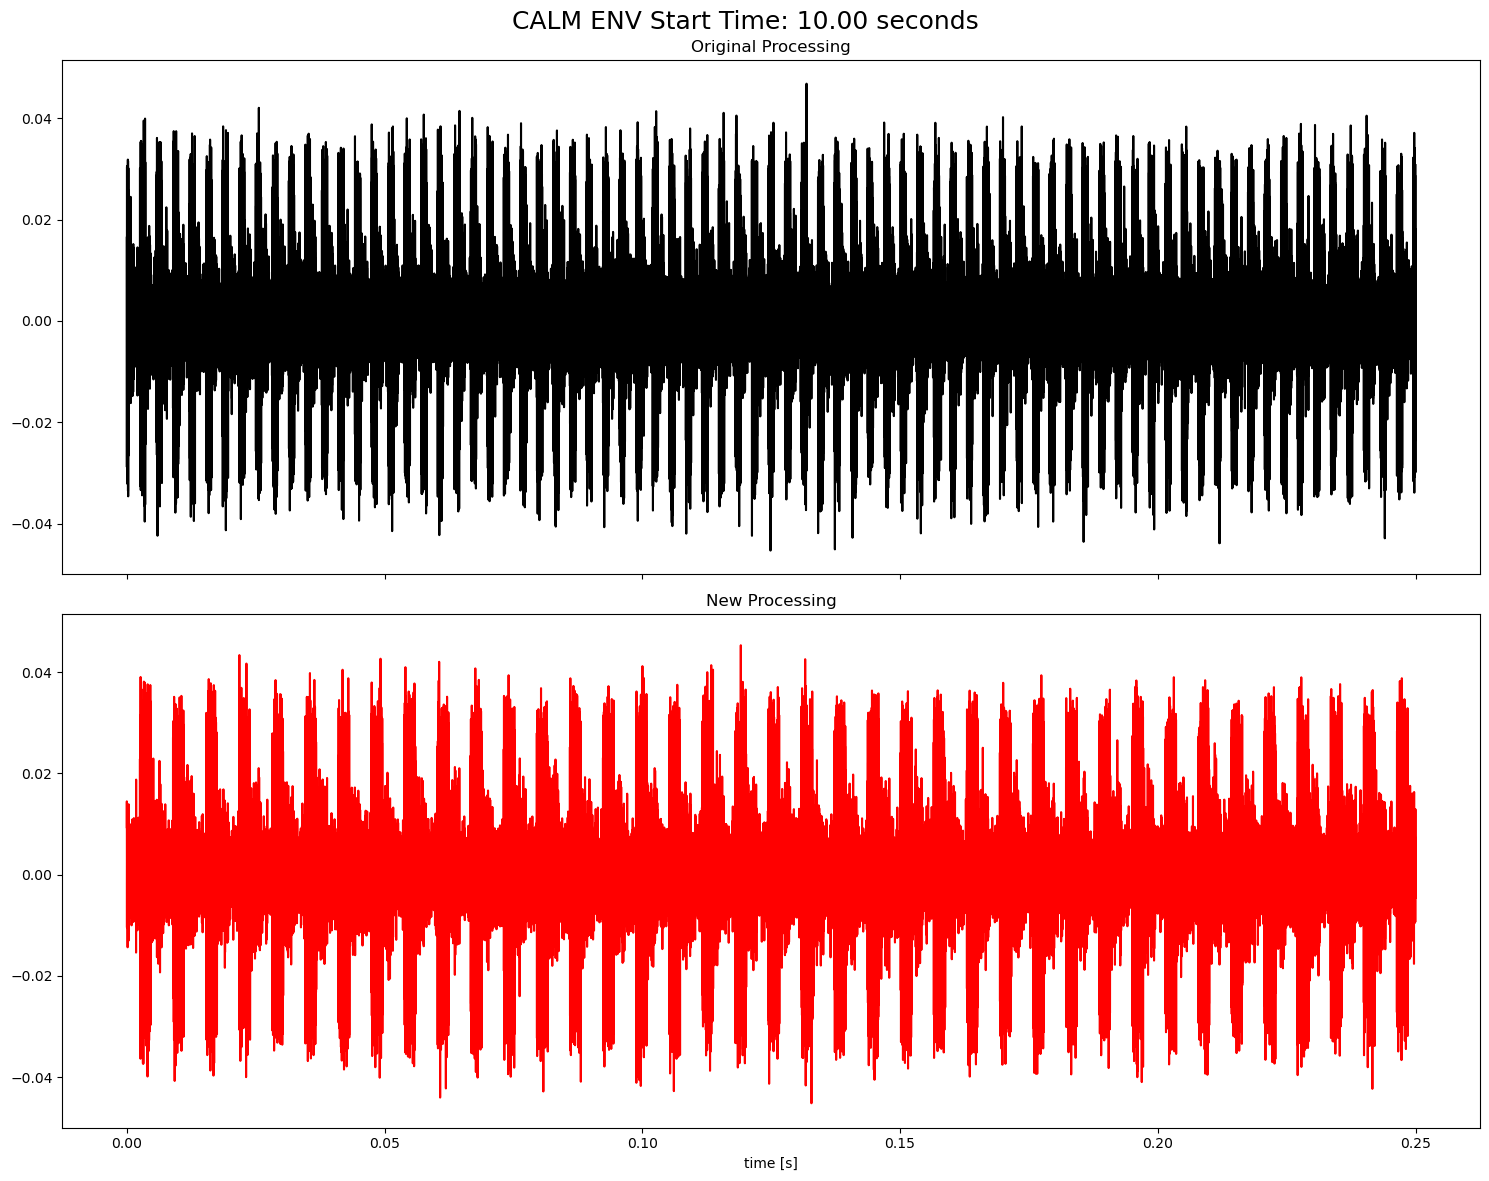

In [29]:
Fs = 125000
dur = 0.25
start_time = 10
si = int(start_time*Fs)  # len(new_w15_data)//2
xlim = int(dur * Fs)

t = np.arange(xlim)*(1/Fs)
fig,axs = plt.subplots(2,1,figsize=[15,12], sharex=True, sharey=True)
axs[0].plot(t,orig_w15_data[si:si+xlim],'k')
axs[1].plot(t,new_w15_data[si:si+xlim],'r')
axs[0].set_title('Original Processing')
axs[1].set_title('New Processing')
axs[1].set_xlabel('time [s]')
fig.suptitle('CALM ENV Start Time: %.2f seconds'%start_time, fontsize=18)
fig.tight_layout()

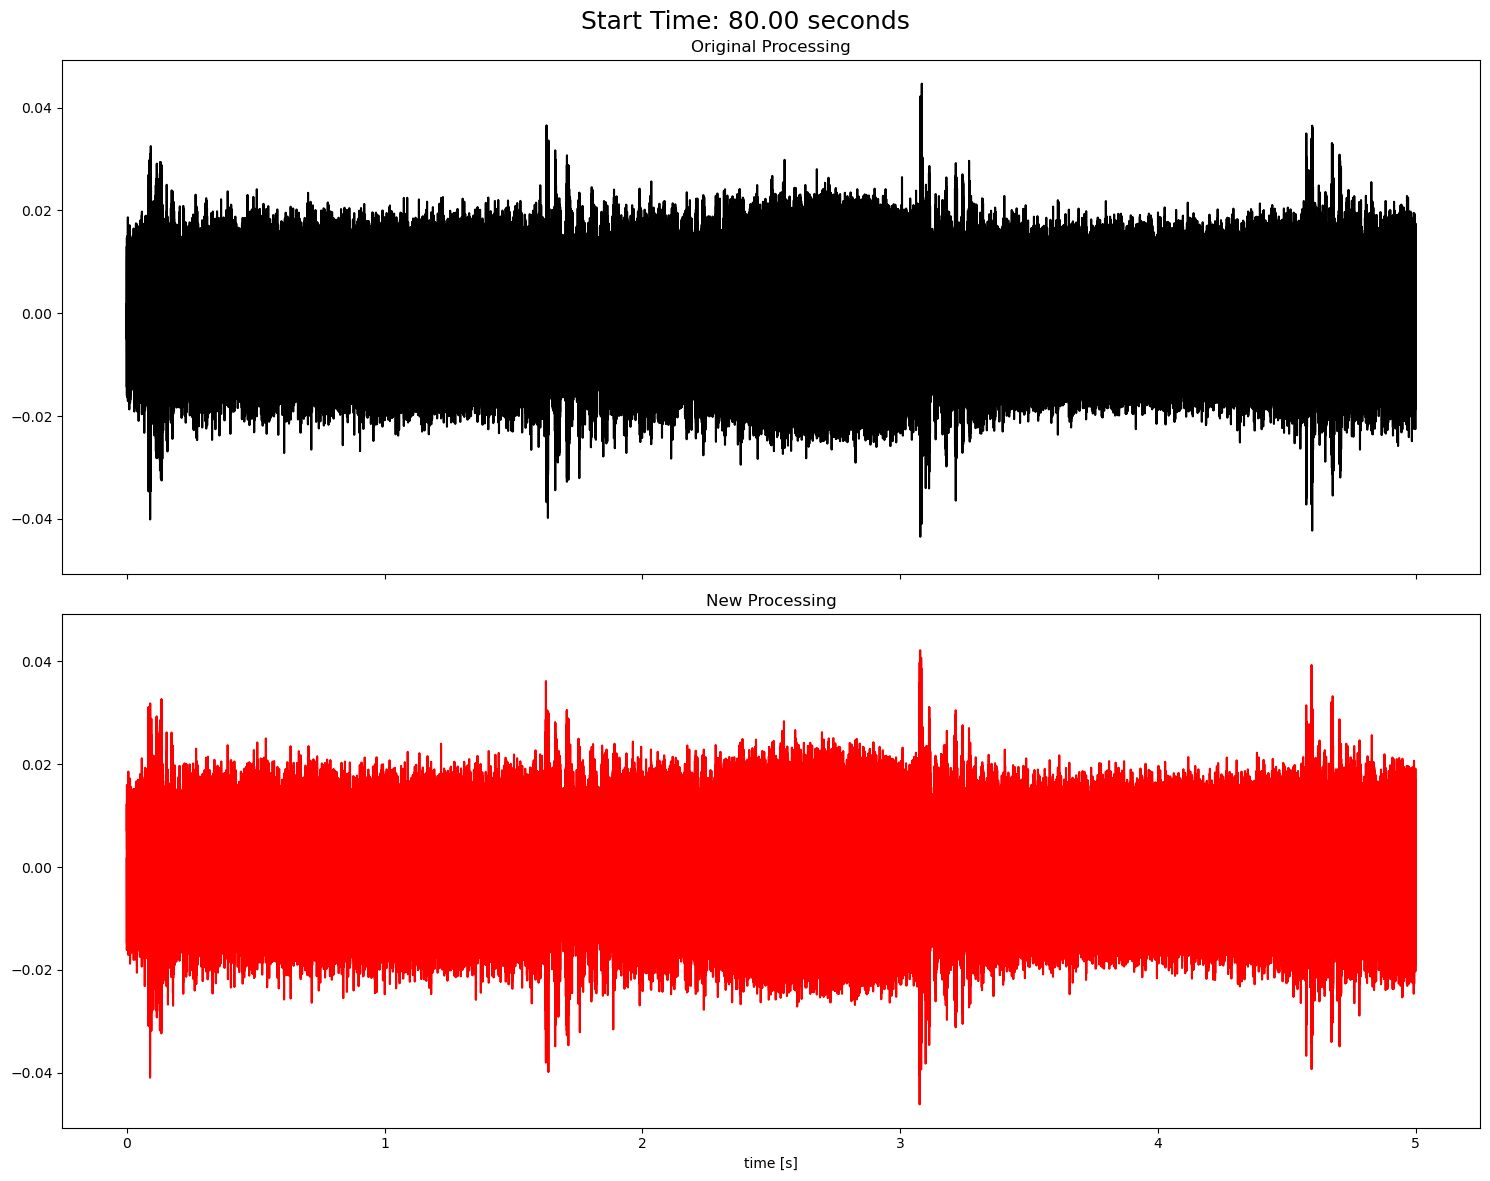

In [23]:
Fs = 125000
dur = 5
start_time = 80
si = int(start_time*Fs)  # len(new_w15_data)//2
xlim = int(dur * Fs)

t = np.arange(xlim)*(1/Fs)
fig,axs = plt.subplots(2,1,figsize=[15,12], sharex=True, sharey=True)
axs[0].plot(t,orig_w15_data[si:si+xlim],'k')
axs[1].plot(t,new_w15_data[si:si+xlim],'r')
axs[0].set_title('Original Processing')
axs[1].set_title('New Processing')
axs[1].set_xlabel('time [s]')
fig.suptitle('Start Time: %.2f seconds'%start_time, fontsize=18)
fig.tight_layout()

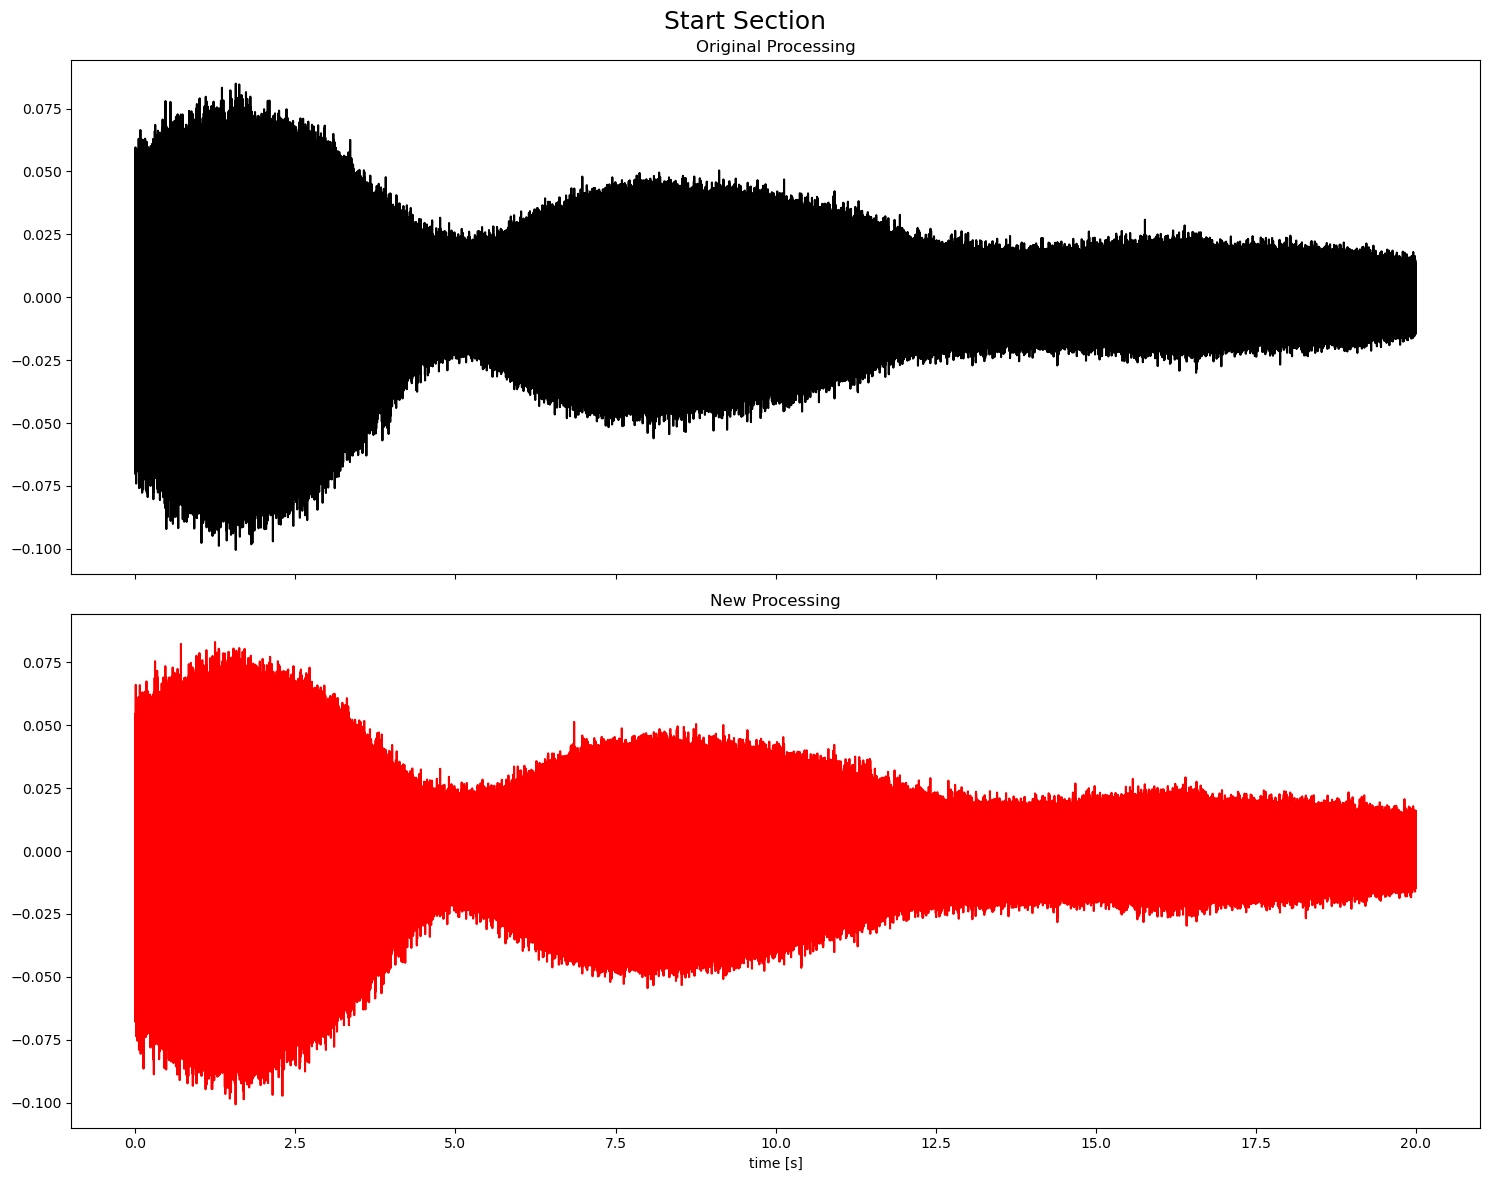

In [6]:
dur = 20
si = 0 
xlim= dur * Fs

t = np.arange(xlim)*(1/Fs)
fig,axs = plt.subplots(2,1,figsize=[15,12], sharex=True, sharey=True)
axs[0].plot(t,orig_w15_data[si:si+xlim],'k')
axs[1].plot(t,new_w15_data[si:si+xlim],'r')
axs[0].set_title('Original Processing')
axs[1].set_title('New Processing')
axs[1].set_xlabel('time [s]')
fig.suptitle('Start Section', fontsize=18)
fig.tight_layout()

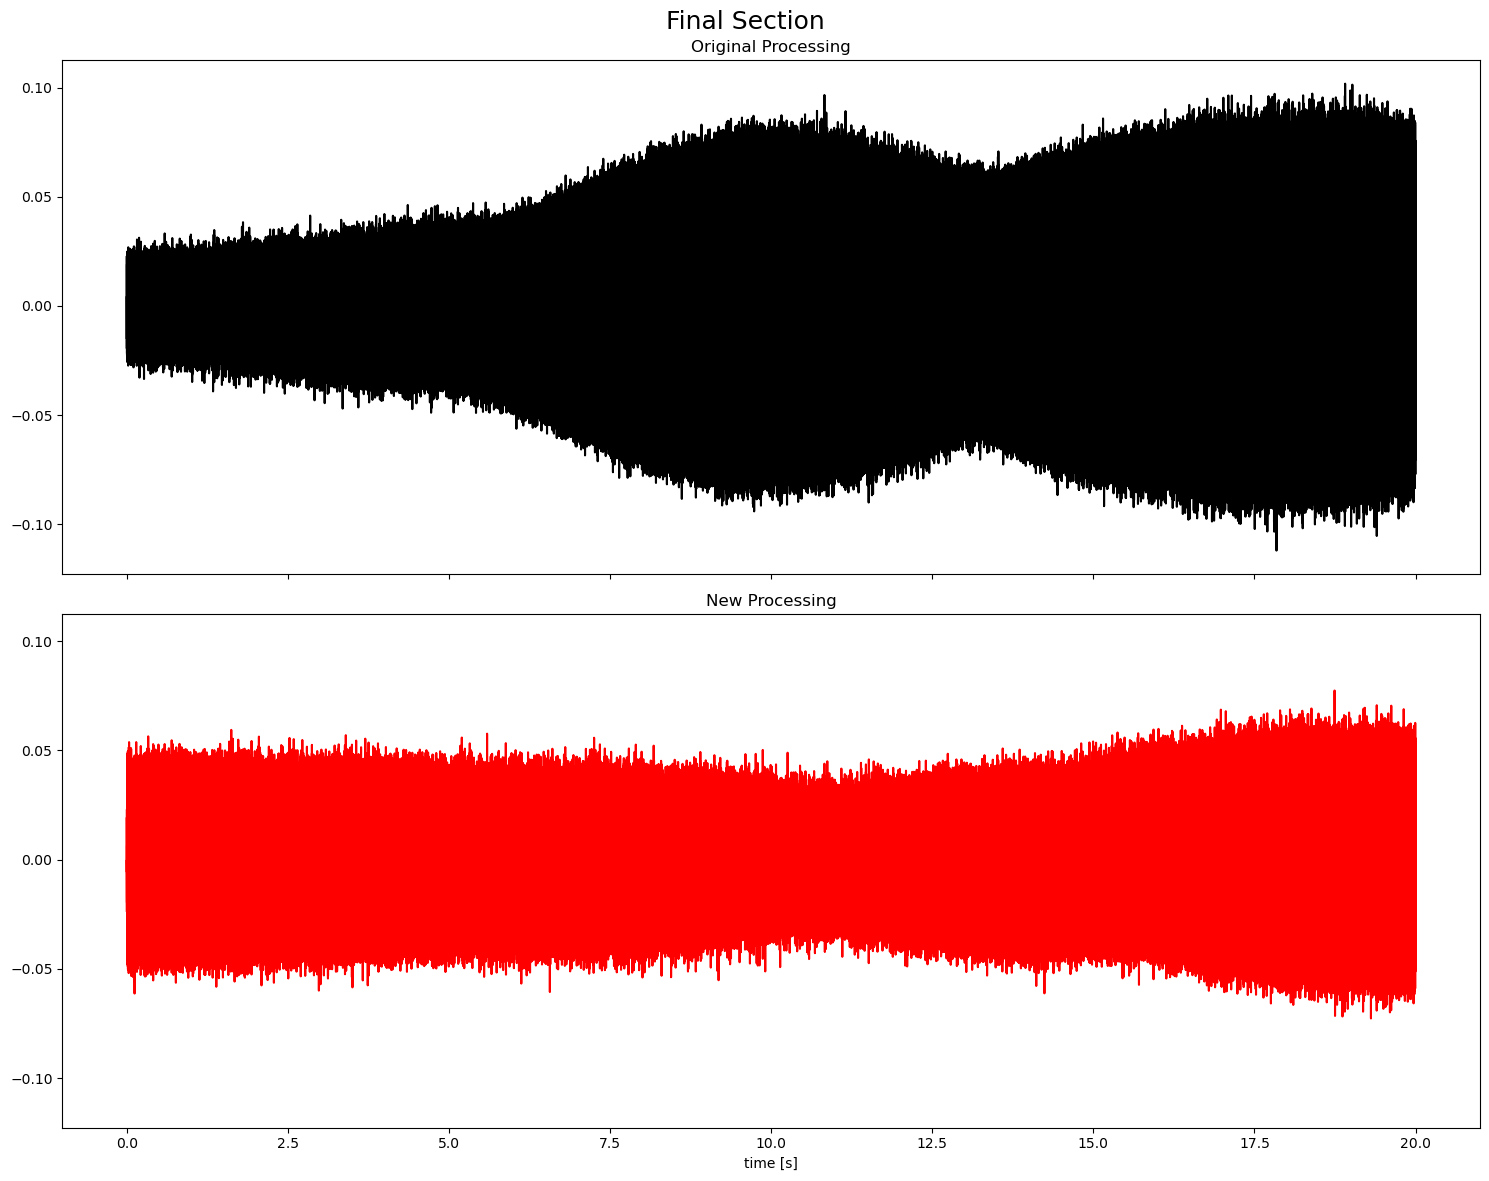

In [36]:
dur = 20
xlim = dur * Fs

t = np.arange(xlim)*(1/Fs)
fig,axs = plt.subplots(2,1,figsize=[15,12], sharex=True, sharey=True)
axs[0].plot(t,orig_w15_data[-xlim:],'k')
axs[1].plot(t,new_w15_data[-xlim:],'r')
axs[0].set_title('Original Processing')
axs[1].set_title('New Processing')
axs[1].set_xlabel('time [s]')
fig.suptitle('Final Section', fontsize=18)
fig.tight_layout()